In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Creating a target variable to make classification easy

In [4]:
df["Target"]=np.where(df["quality"]>6,1,0)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


### Checking null values

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Target                  0
dtype: int64

### Checked Duplicates

In [7]:
df.duplicated().sum()

240

### Droppiing duplicates

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(1359, 13)

#### Check data types

In [11]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Target                    int32
dtype: object

In [12]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
Target                    2
dtype: int64

### Eda

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Target'],
      dtype='object')

In [14]:
num_cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

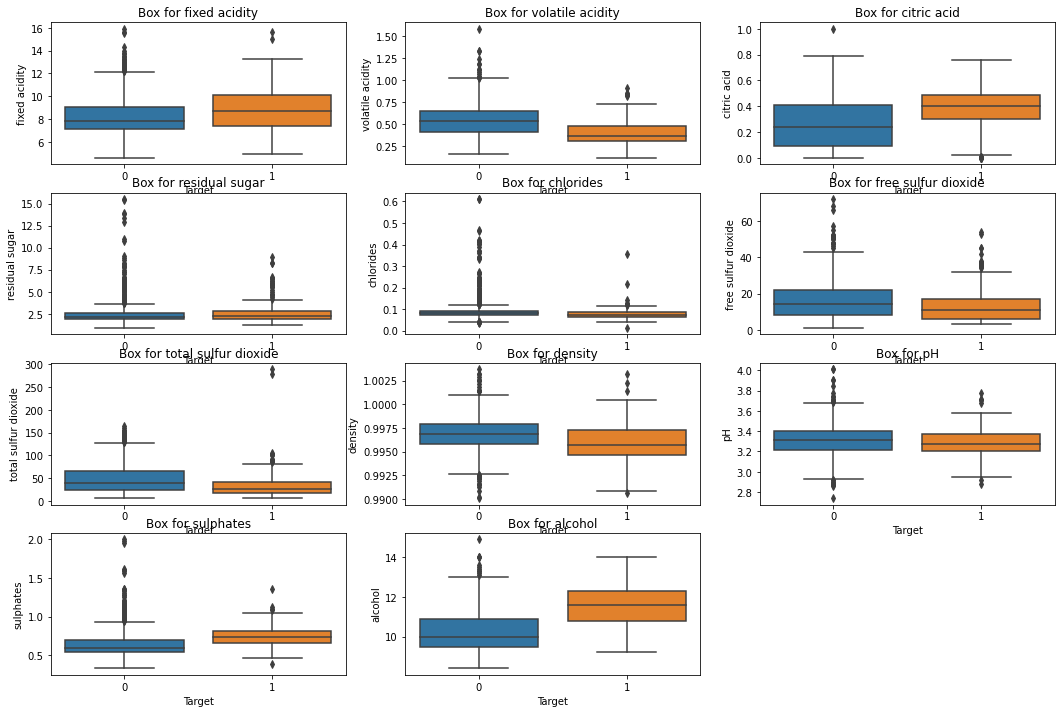

In [15]:
plt.figure(figsize=(18,12))
for i in range(0,len(num_cols)):
    plt.subplot(4,3,i+1)
    sns.boxplot(y=df[num_cols[i]],x=df['Target'])
    plt.title(f'Box for {num_cols[i]}')

plt.show()

In [16]:
df.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,50%,96%,97%,98%,99%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,5.200000,5.51600,5.774000,6.000000,6.100000,7.9000,11.968000,12.326000,12.60000,13.24200,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.200000,0.23000,0.247400,0.260000,0.270000,0.5200,0.880000,0.910000,0.96500,1.02920,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.2600,0.636800,0.660000,0.68000,0.70420,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.400000,1.40000,1.400000,1.500000,1.600000,2.2000,5.500000,6.000000,6.59200,8.30000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.042000,0.04600,0.049000,0.050000,0.053000,0.0790,0.163720,0.180080,0.23584,0.36842,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,3.000000,3.00000,3.000000,4.000000,4.000000,14.0000,37.000000,39.000000,42.00000,50.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,8.000000,9.00000,10.000000,11.000000,11.000000,38.0000,120.000000,127.000000,135.84000,145.84000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.991872,0.99258,0.993175,0.993403,0.993569,0.9967,1.000084,1.000243,1.00060,1.00140,1.00369
pH,1359.0,3.309787,0.155036,2.74000,2.940000,3.00000,3.030000,3.040000,3.060000,3.3100,3.580000,3.600000,3.63000,3.70420,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.430000,0.44000,0.450000,0.460000,0.470000,0.6200,0.996800,1.060000,1.13840,1.28000,2.00000


### Kde plot before treating outliers

In [17]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Target'],
      dtype='object')

In [18]:
k=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Target']

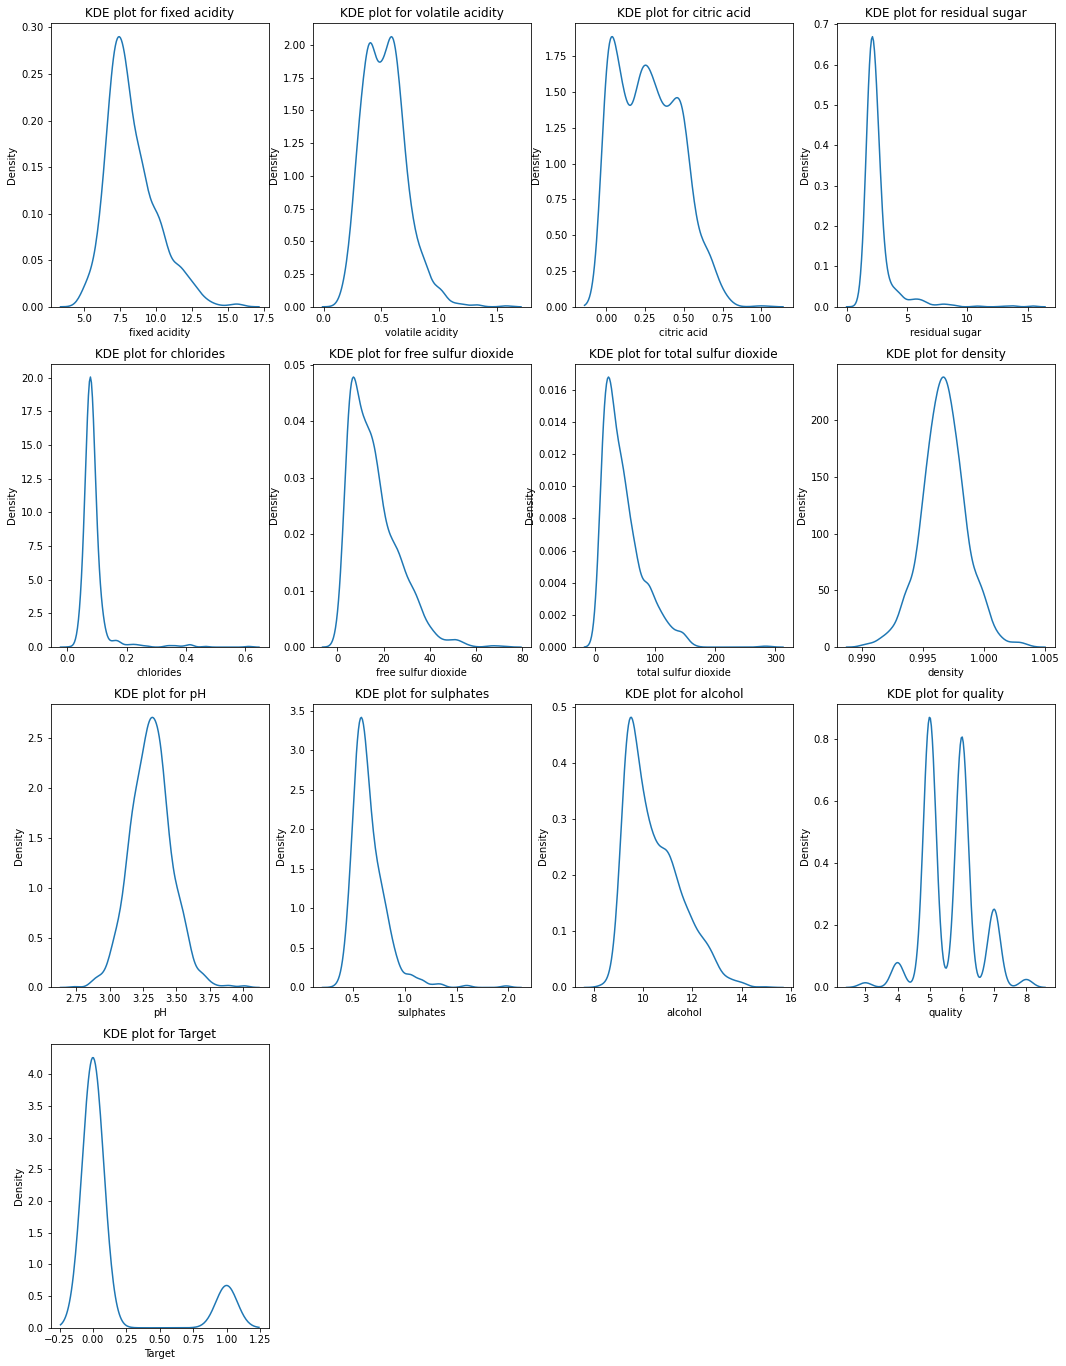

In [19]:
plt.figure(figsize=(18,24))
for i in range(0,len(k)):
    plt.subplot(4,4,i+1)
    sns.kdeplot(x=df[k[i]])
    plt.title(f'KDE plot for {k[i]}')
plt.show()

### Inference

fixed acidity right skewed <br>
volatile acidity has two peaks and right skewed<br>
citric acid is right skewed<br>
residual sugar highly right skewed<br>
Chlorider is highly right skewed <br>
Free sulphur oxide is right skewed<br>
Total sulphur oxide is highly right skewed<br>
density ,ph are normally distributed<br>
Sulphates slightly right skewed<br>
alcohol right skewed<br>
Target variable is imbalance<br>
<br>
<br>

### Correlation

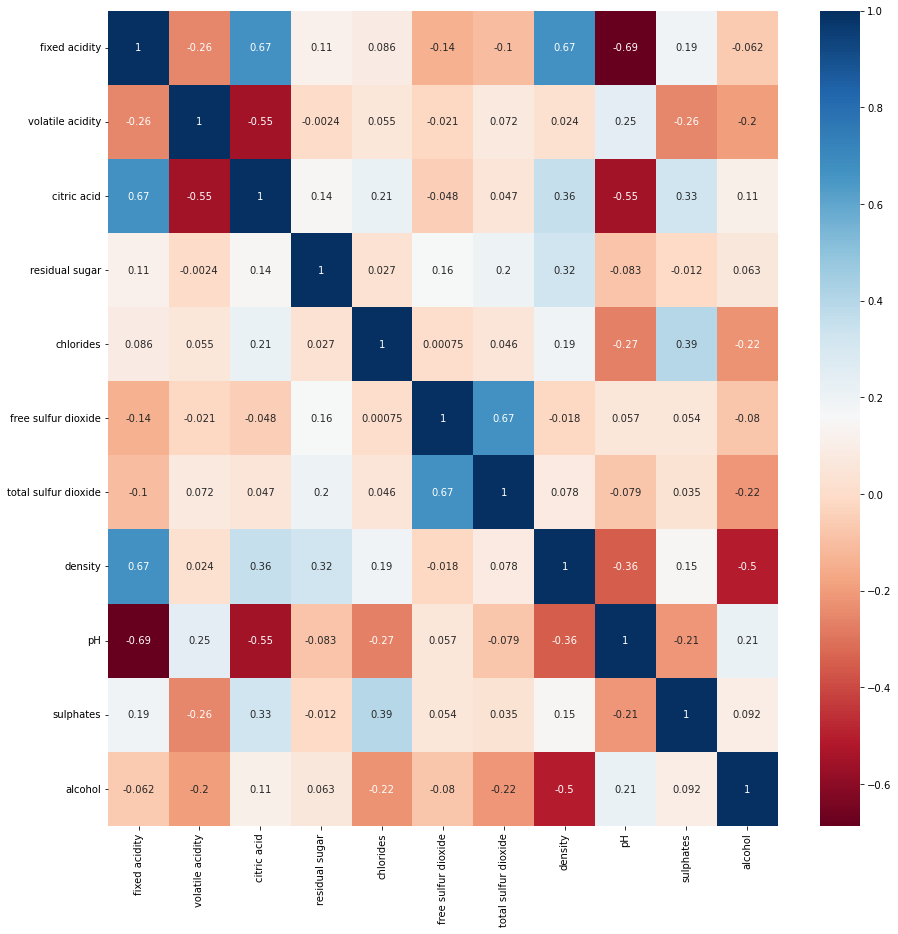

In [20]:
corr = df[num_cols].corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

### Inference 
Citric acid highly correlated with citric acid<br>
citric acid correlated with sulphates<br>
Chloride is highly correlated with sulphates<br>

In [21]:
df["quality"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [22]:
df["Target"].value_counts()

0    1175
1     184
Name: Target, dtype: int64

### Treating outliers

In [23]:
df.shape

(1359, 13)

In [24]:
df.describe(percentiles=[0.01,0.02,0.03,0.04,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,4%,50%,96%,97%,98%,99%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,5.200000,5.51600,5.774000,6.000000,7.9000,11.968000,12.326000,12.60000,13.24200,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.200000,0.23000,0.247400,0.260000,0.5200,0.880000,0.910000,0.96500,1.02920,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.000000,0.00000,0.000000,0.000000,0.2600,0.636800,0.660000,0.68000,0.70420,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.400000,1.40000,1.400000,1.500000,2.2000,5.500000,6.000000,6.59200,8.30000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.042000,0.04600,0.049000,0.050000,0.0790,0.163720,0.180080,0.23584,0.36842,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,3.000000,3.00000,3.000000,4.000000,14.0000,37.000000,39.000000,42.00000,50.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,8.000000,9.00000,10.000000,11.000000,38.0000,120.000000,127.000000,135.84000,145.84000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.991872,0.99258,0.993175,0.993403,0.9967,1.000084,1.000243,1.00060,1.00140,1.00369
pH,1359.0,3.309787,0.155036,2.74000,2.940000,3.00000,3.030000,3.040000,3.3100,3.580000,3.600000,3.63000,3.70420,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.430000,0.44000,0.450000,0.460000,0.6200,0.996800,1.060000,1.13840,1.28000,2.00000


In [25]:
cols_left_skewed = ["fixed acidity","volatile acidity","residual sugar","citric acid","chlorides","free sulfur dioxide","total sulfur dioxide"]

def lower_outlier_treatment(x):
    x = x.clip(lower = x.quantile(0.01))
    return x

In [26]:
df[cols_left_skewed] = df[cols_left_skewed].apply(lower_outlier_treatment)

In [27]:
cols_right_skewed = ["fixed acidity","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","sulphates","alcohol"]

def upper_outlier_treatment(x):
    x = x.clip(upper = x.quantile(0.99))
    return x

In [28]:
df[cols_right_skewed] = df[cols_right_skewed].apply(lower_outlier_treatment)

In [29]:
df.shape

(1359, 13)

### Kde after outlier treatment

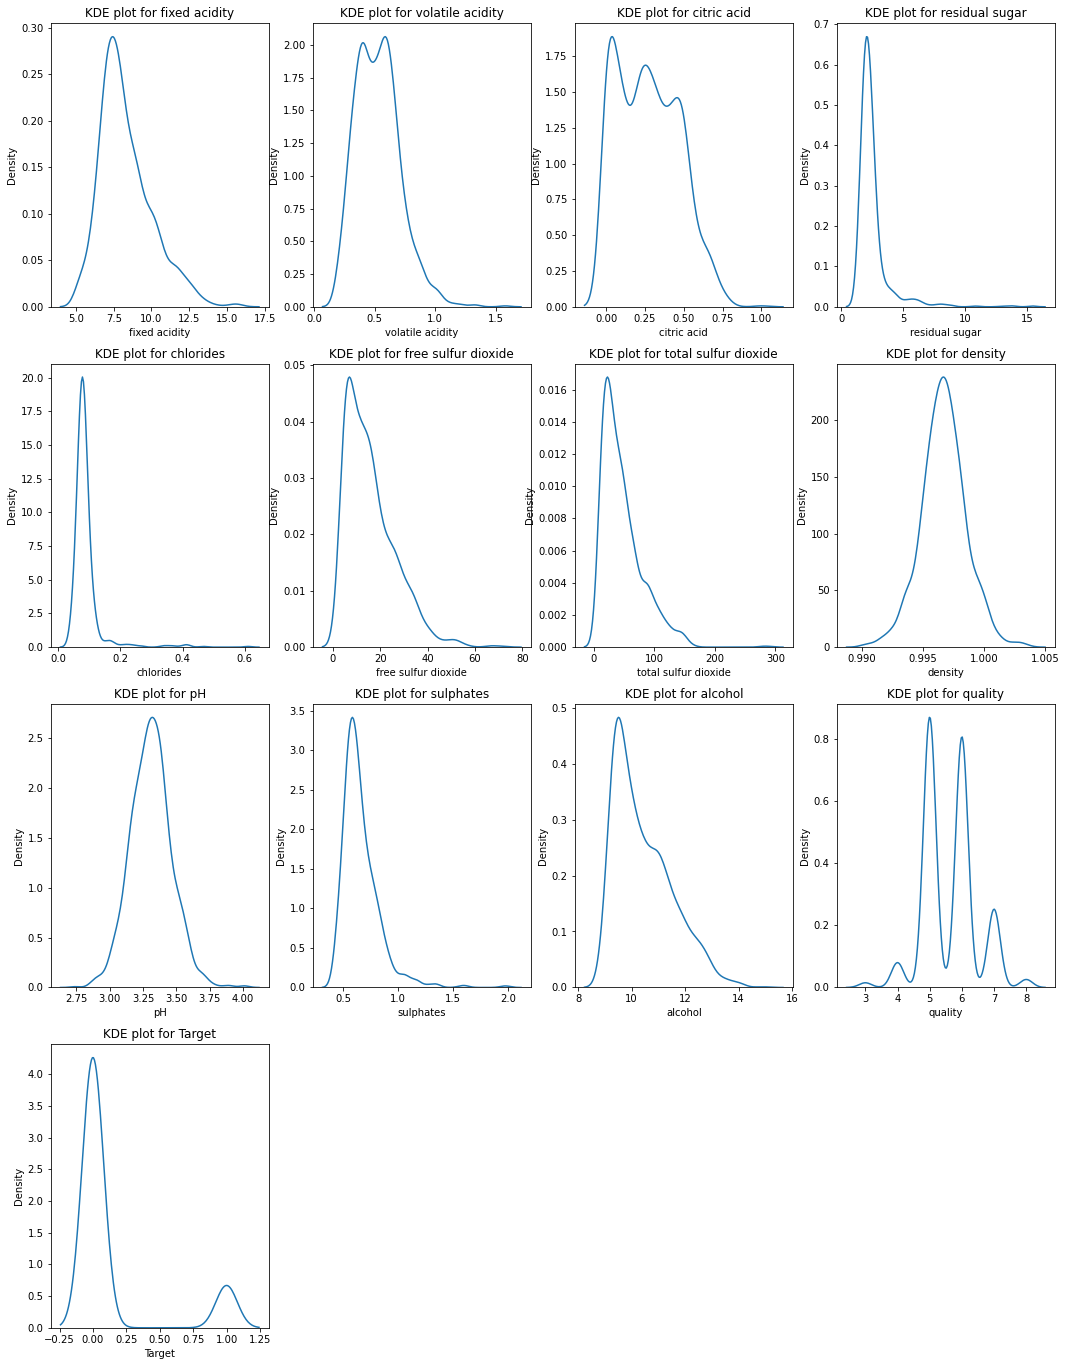

In [30]:
plt.figure(figsize=(18,24))
for i in range(0,len(k)):
    plt.subplot(4,4,i+1)
    sns.kdeplot(x=df[k[i]])
    plt.title(f'KDE plot for {k[i]}')
plt.show()

In [31]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Target                    int32
dtype: object

### Finding Target Variable is Distributed or not

In [32]:
from scipy.stats import shapiro, jarque_bera
from scipy.stats import boxcox
# Ho : Data is normally dist => p>0.05
# H1 : Data is not normally dist => p<=0.05

In [33]:
test_stat,p = jarque_bera(df['Target'])
print(test_stat)
print(p)

1394.8997455634892
0.0
